# AI-based Cybercrime Detection and Prevention System for CyberGuard AI Hackathon

![image.png](attachment:7affbd34-d643-469a-b49f-8502594bf01c.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/cyber_train_data.csv', encoding='latin1')


In [5]:
df.head()

category                       sub_category  \
0  Online and Social Media Related Crime  Cyber Bullying  Stalking  Sexting   
1                 Online Financial Fraud                  Fraud CallVishing   
2               Online Gambling  Betting           Online Gambling  Betting   
3  Online and Social Media Related Crime                   Online Job Fraud   
4                 Online Financial Fraud                  Fraud CallVishing   

                                  crimeaditionalinfo  
0  I had continue received random calls and abusi...  
1  The above fraudster is continuously messaging ...  
2  He is acting like a police and demanding for m...  
3  In apna Job I have applied for job interview f...  
4  I received a call from lady stating that she w...

In [ ]:
df.tail()

category                    sub_category  \
93681                 Online Financial Fraud  Internet Banking Related Fraud   
93682                 Online Financial Fraud           EWallet Related Fraud   
93683                 Online Financial Fraud              UPI Related Frauds   
93684  Online and Social Media Related Crime        Online Matrimonial Fraud   
93685                 Online Financial Fraud               Fraud CallVishing   

                                      crimeaditionalinfo  
93681  Identity theft   Smishing SMS Fraud  CreditDeb...  
93682  RECEIVED CALL FROM  NUMBER ASKING ABOUT phone ...  
93683  Cyber Stalking   Blackmailing   PhoneSMSVOIP C...  
93684  Call karke bola ki aapka lotary laga ha aru AC...  
93685  There is app name koko loan app they send the ...

In [6]:
df.shape

(35016, 3)

In [7]:
df.columns

Index(['category', 'sub_category', 'crimeaditionalinfo'], dtype='object')

In [8]:
df.duplicated().sum()

np.int64(2470)

In [9]:
df =df.drop_duplicates()

In [10]:
df.isnull().sum()

category                 0
sub_category          1482
crimeaditionalinfo       4
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31060 entries, 0 to 35015
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31060 non-null  object
 1   sub_category        31060 non-null  object
 2   crimeaditionalinfo  31060 non-null  object
dtypes: object(3)
memory usage: 970.6+ KB


In [13]:
df.nunique()

category                 10
sub_category             34
crimeaditionalinfo    30745
dtype: int64

In [14]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['category', 'sub_category', 'crimeaditionalinfo'], dtype='object')

Numerical type columns:
Index([], dtype='object')


In [15]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 40:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [16]:
categorical_features, non_categorical_features, discrete_features, continuous_features = classify_features(df)

print("Categorical Features:", categorical_features)
print("Non-Categorical Features:", non_categorical_features)
print("Discrete Features:", discrete_features)
print("Continuous Features:", continuous_features)


Categorical Features: ['category', 'sub_category']
Non-Categorical Features: ['crimeaditionalinfo']
Discrete Features: []
Continuous Features: []


In [17]:
for i in categorical_features:
    print(i)
    print(df[i].unique())
    print()

category
['Online and Social Media Related Crime' 'Online Financial Fraud'
 'Online Gambling  Betting' 'Any Other Cyber Crime'
 'Cyber Attack/ Dependent Crimes' 'Cryptocurrency Crime'
 'Hacking  Damage to computercomputer system etc' 'Cyber Terrorism'
 'Online Cyber Trafficking' 'Ransomware']

sub_category
['Cyber Bullying  Stalking  Sexting' 'Fraud CallVishing'
 'Online Gambling  Betting' 'Online Job Fraud' 'UPI Related Frauds'
 'Internet Banking Related Fraud' 'Other' 'Profile Hacking Identity Theft'
 'DebitCredit Card FraudSim Swap Fraud' 'EWallet Related Fraud'
 'Data Breach/Theft' 'Cheating by Impersonation'
 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks'
 'FakeImpersonating Profile' 'Cryptocurrency Fraud' 'Malware Attack'
 'Business Email CompromiseEmail Takeover' 'Email Hacking'
 'Hacking/Defacement' 'Unauthorised AccessData Breach' 'SQL Injection'
 'Provocative Speech for unlawful acts' 'Ransomware Attack'
 'Cyber Terrorism' 'Tampering with computer sour

In [18]:
for i in categorical_features:
    print(i)
    print(df[i].value_counts())
    print()

category
category
Online Financial Fraud                            19977
Online and Social Media Related Crime              4510
Any Other Cyber Crime                              4048
Cyber Attack/ Dependent Crimes                     1358
Hacking  Damage to computercomputer system etc      662
Cryptocurrency Crime                                185
Online Gambling  Betting                            169
Online Cyber Trafficking                             72
Cyber Terrorism                                      63
Ransomware                                           16
Name: count, dtype: int64

sub_category
sub_category
UPI Related Frauds                                                      8957
Other                                                                   4048
DebitCredit Card FraudSim Swap Fraud                                    3803
Internet Banking Related Fraud                                          3126
Fraud CallVishing                                            

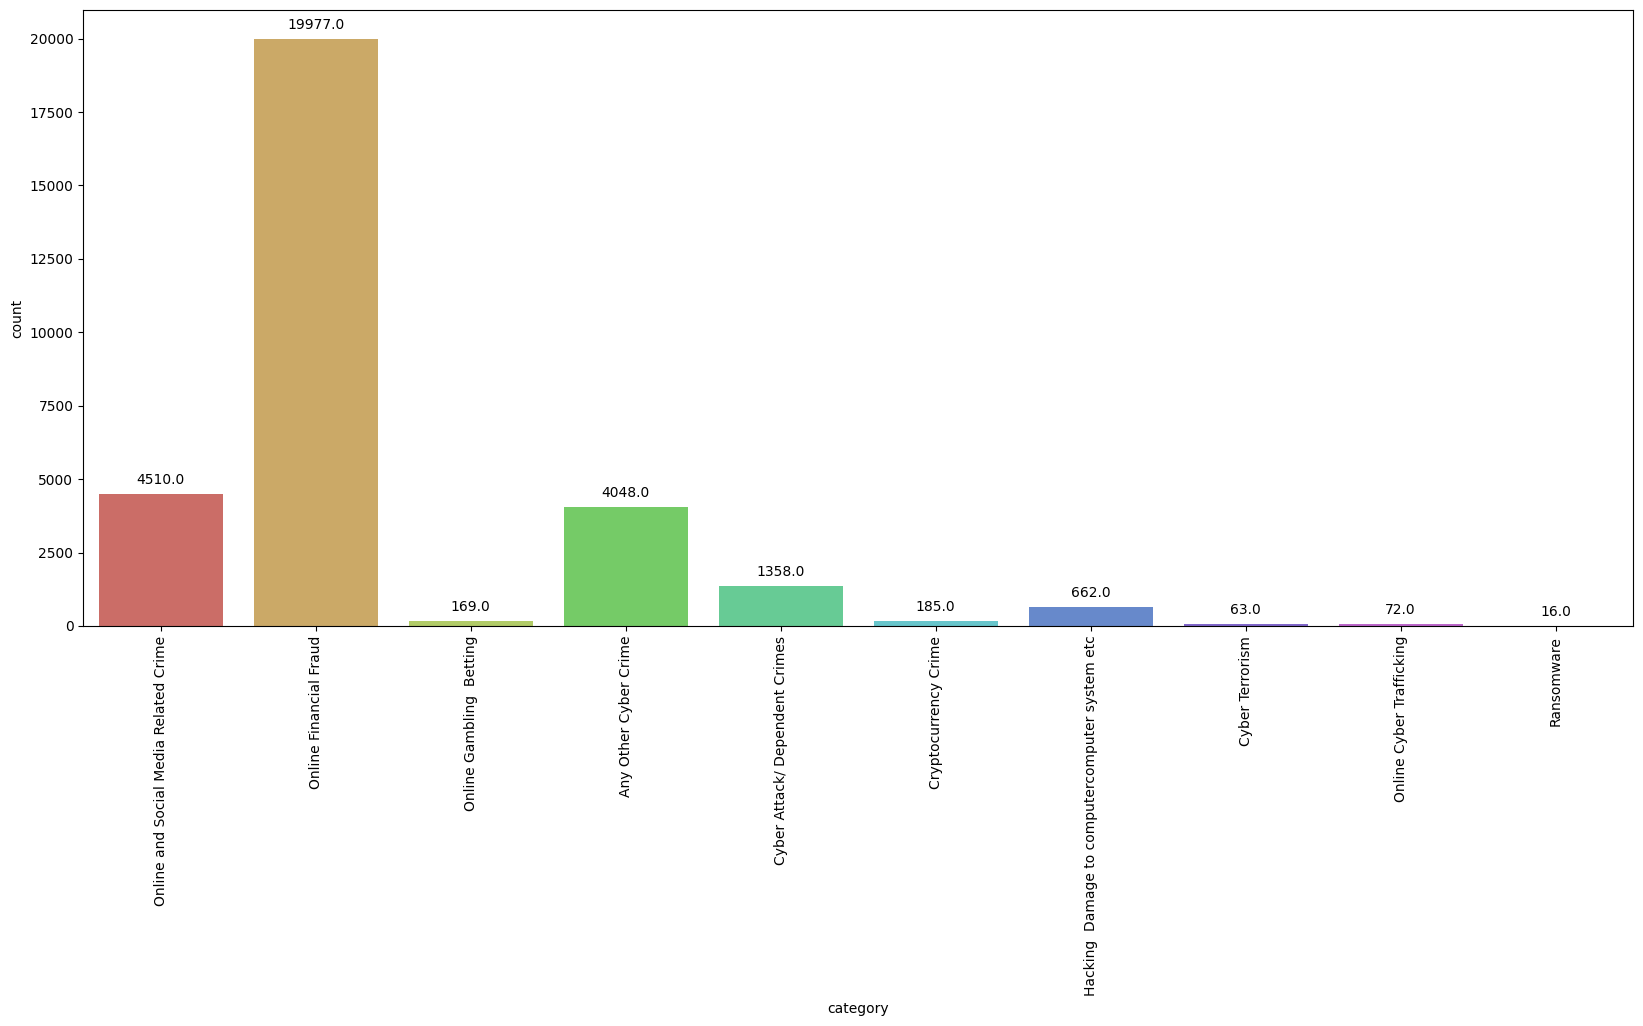

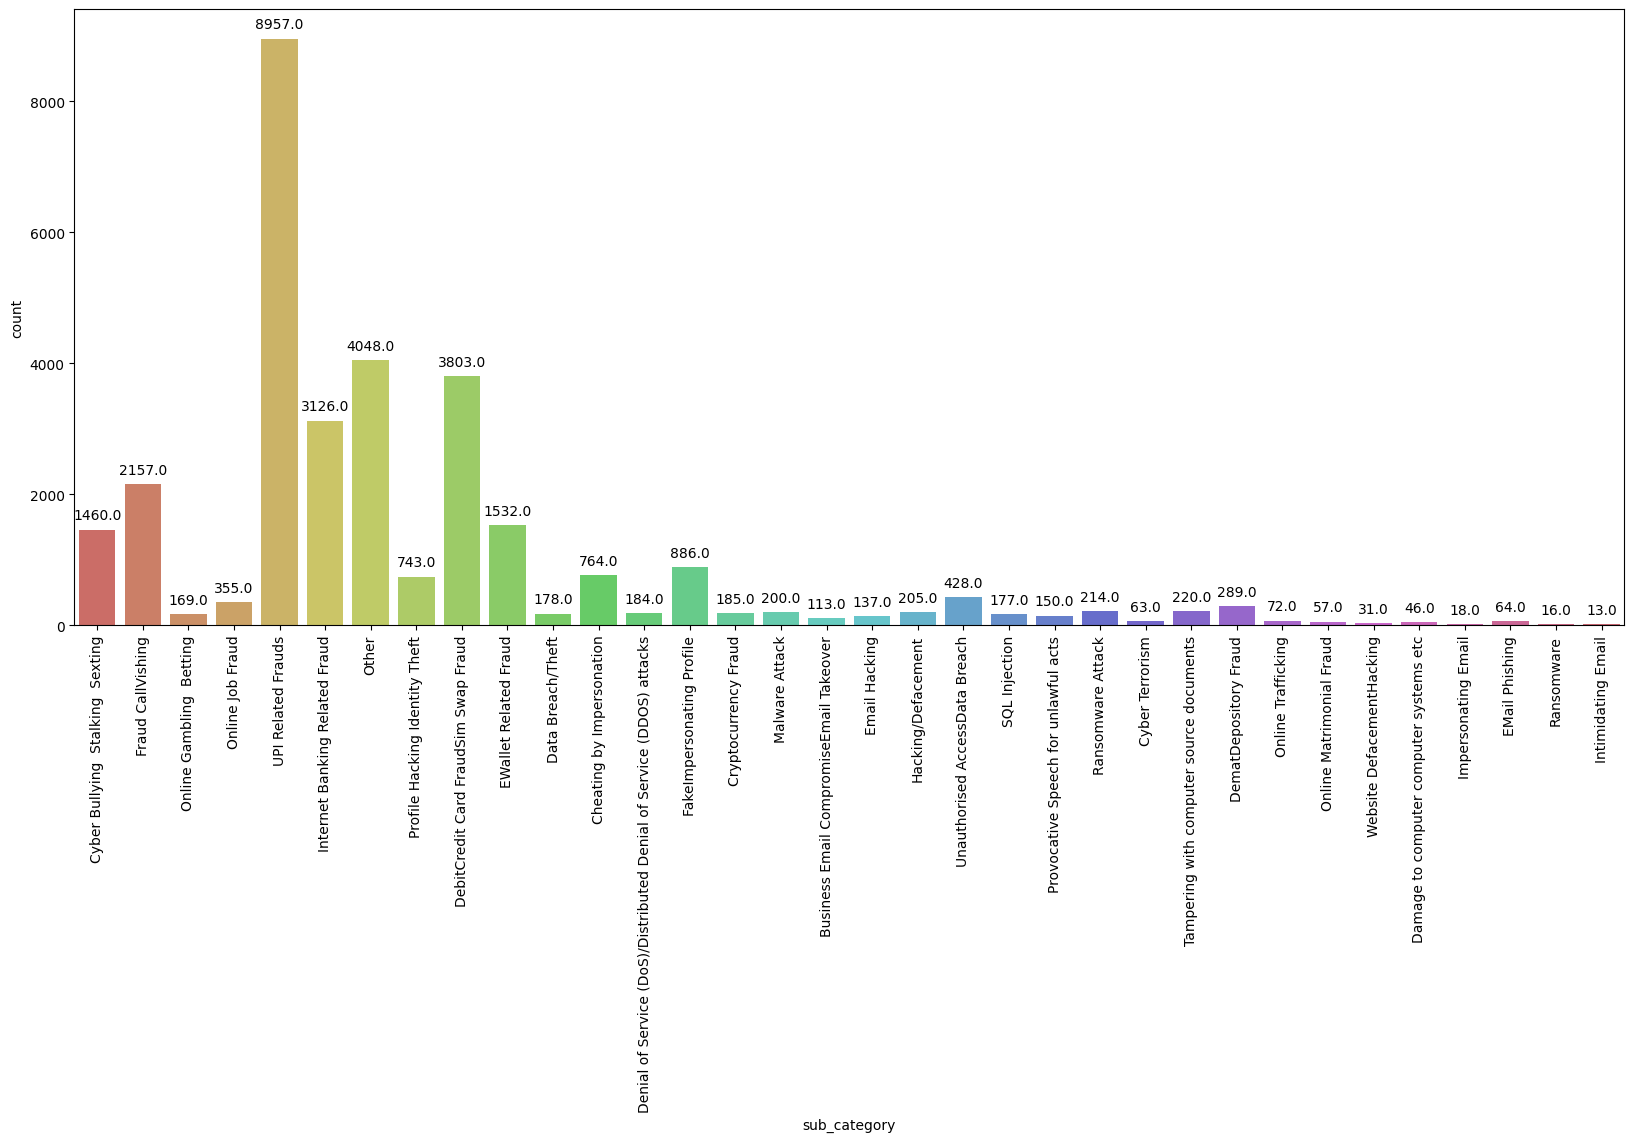

In [19]:
for i in categorical_features:
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.xticks(rotation = 90)
    plt.show()

In [20]:
import plotly.express as px

categories = [
    'Online Financial Fraud', 'Online and Social Media Related Crime',
    'Any Other Cyber Crime', 'Cyber Attack/ Dependent Crimes',
    'Hacking  Damage to computercomputer system etc', 'Cryptocurrency Crime',
    'Online Gambling  Betting', 'Online Cyber Trafficking',
    'Cyber Terrorism', 'Ransomware', 'Report Unlawful Content'
]
counts = [52496, 12076, 10811, 3608, 1709, 473, 444, 183, 161, 56, 1]

fig = px.pie(
    names=categories,
    values=counts,
    title='Distribution of Cyber Crime Categories'
)

fig.show()

In [21]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'[^\x00-\x7F]+', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\d+', '', text)

    tokens = nltk.word_tokenize(text)

    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]

    clean_text = ' '.join(tokens)

    return clean_text

df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [22]:
df

category  \
0      Online and Social Media Related Crime   
1                     Online Financial Fraud   
2                   Online Gambling  Betting   
3      Online and Social Media Related Crime   
4                     Online Financial Fraud   
...                                      ...   
35011                 Online Financial Fraud   
35012                 Online Financial Fraud   
35013                  Any Other Cyber Crime   
35014                 Online Financial Fraud   
35015  Online and Social Media Related Crime   

                               sub_category  \
0         Cyber Bullying  Stalking  Sexting   
1                         Fraud CallVishing   
2                  Online Gambling  Betting   
3                          Online Job Fraud   
4                         Fraud CallVishing   
...                                     ...   
35011  DebitCredit Card FraudSim Swap Fraud   
35012  DebitCredit Card FraudSim Swap Fraud   
35013                                 Other   
35014                    UPI Related Frauds   
35015        Profile Hacking Identity Theft   

                                      crimeaditionalinfo  
0      continue received random call abusive message ...  
1      fraudster continuously messaging asking pay mo...  
2      acting like police demanding money adding sect...  
3      apna job applied job interview telecalling res...  
4      received call lady stating send new phone vivo...  
...                                                  ...  
35011  made payment via paytm due disturbance complai...  
35012  identity theft smishing sm fraud creditdebit c...  
35013  money ghaziabad applied loan online applicatio...  
35014  stole mobile using image blackmailing upload p...  
35015  fraud misusing identity demanding money abusin...  

[31060 rows x 3 columns]

In [23]:
from wordcloud import WordCloud

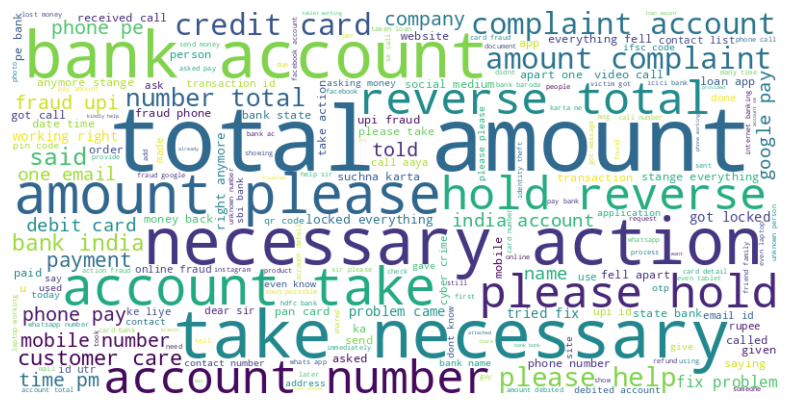

In [24]:

import matplotlib.pyplot as plt

# Join the text data in the 'crimeaditionalinfo' column
text_for_wordcloud = ' '.join(df['crimeaditionalinfo'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


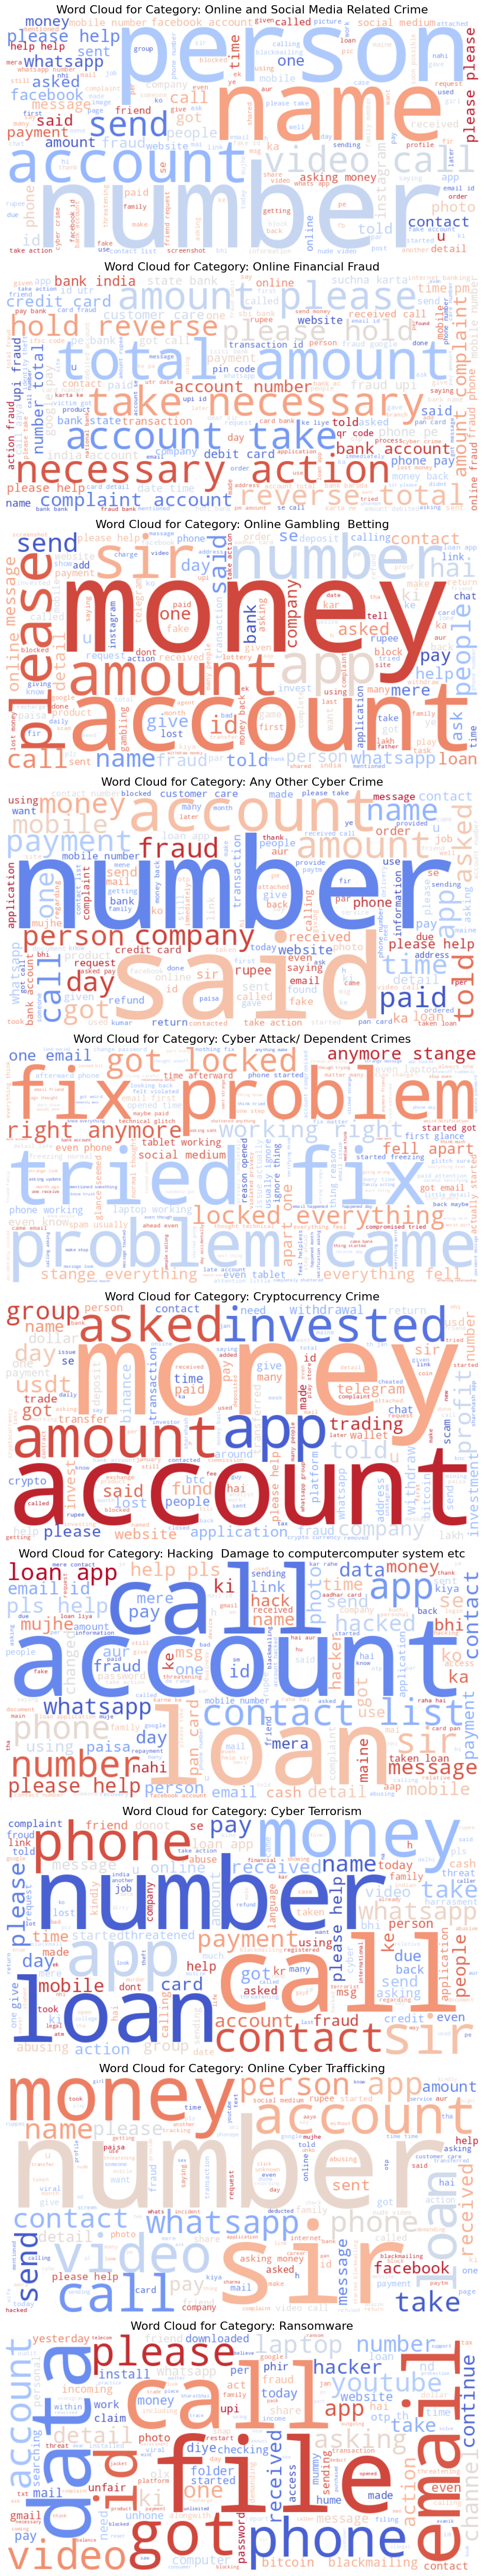

In [25]:
categories = df['category'].unique()
fig, axes = plt.subplots(len(categories), 1, figsize=(10, 5 * len(categories)))

for i, category in enumerate(categories):
    text_for_wordcloud = ' '.join(df[df['category'] == category]['crimeaditionalinfo'])

    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='coolwarm',
        max_words=150,
        contour_color='black',
        contour_width=3
    ).generate(text_for_wordcloud)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"Word Cloud for Category: {category}", fontsize=16)

plt.tight_layout()
plt.show()

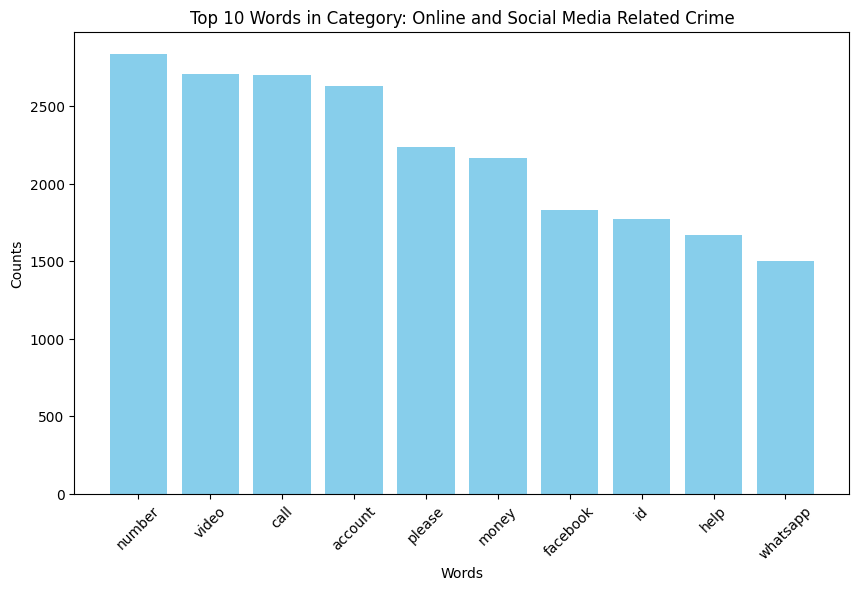

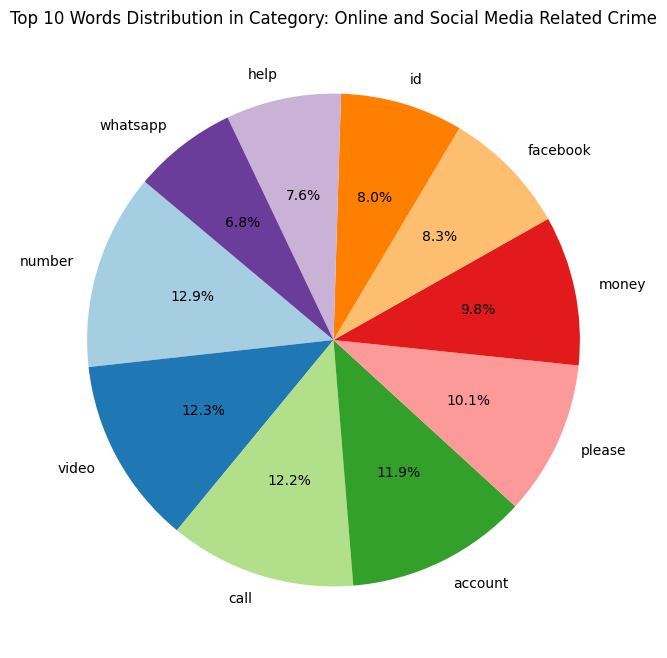

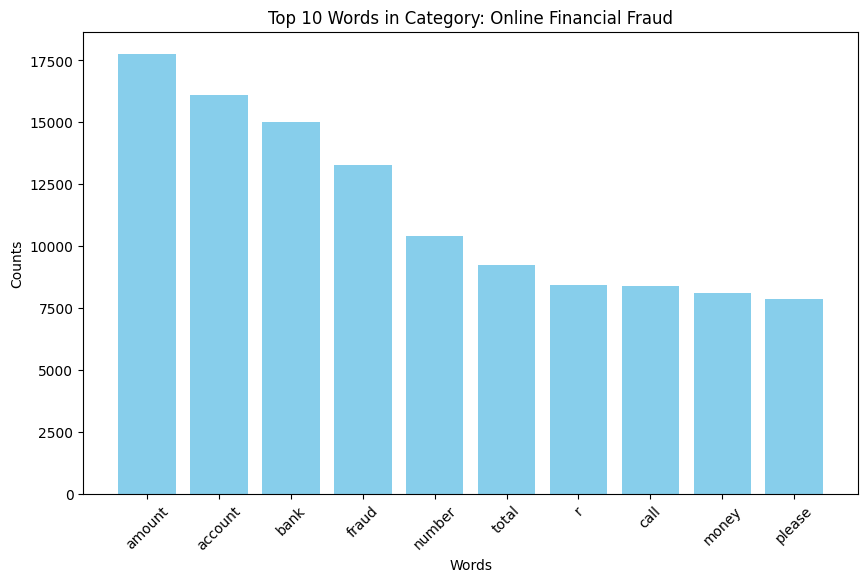

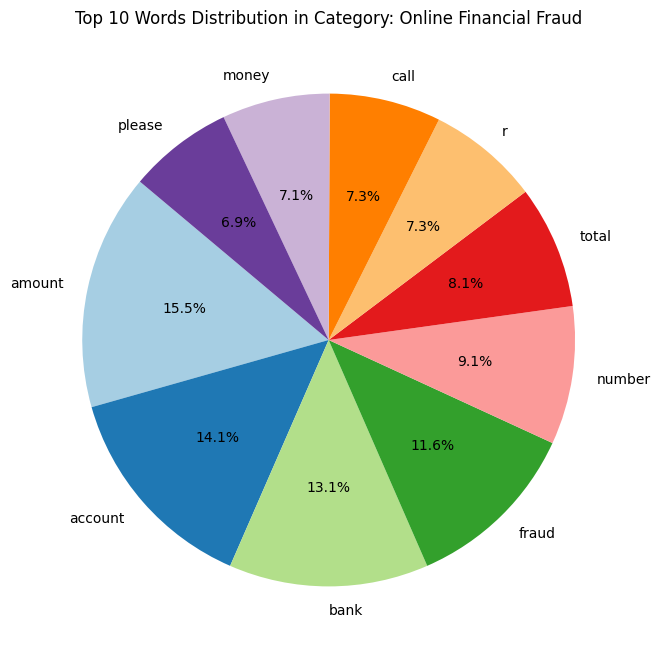

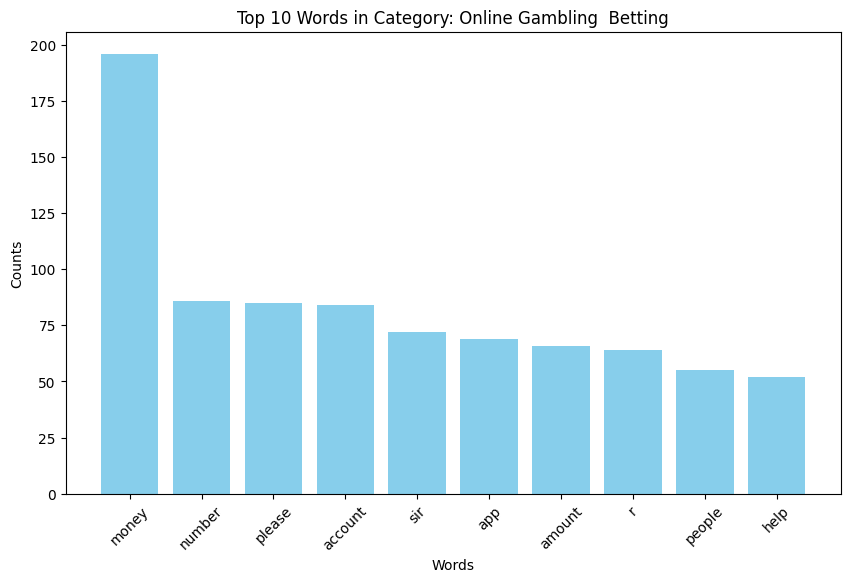

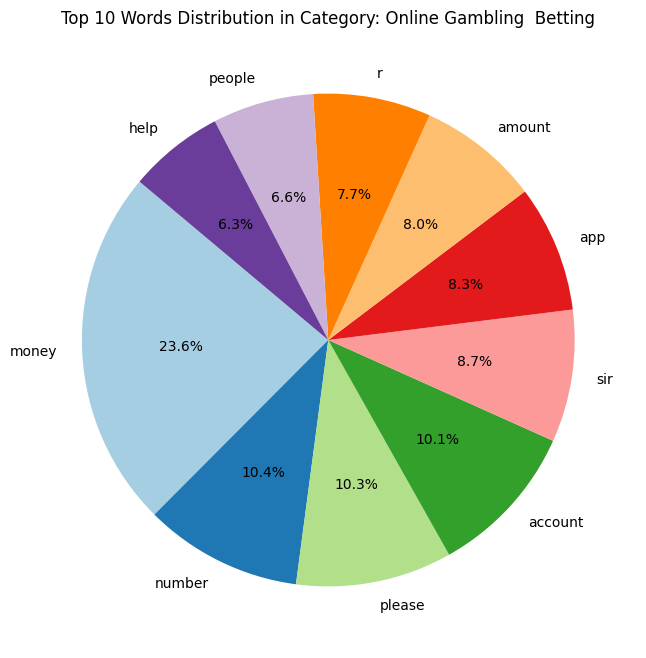

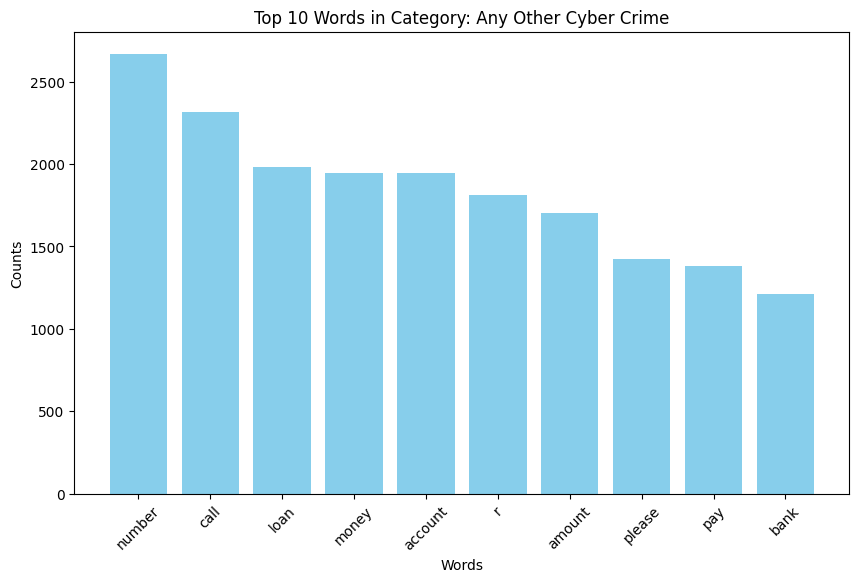

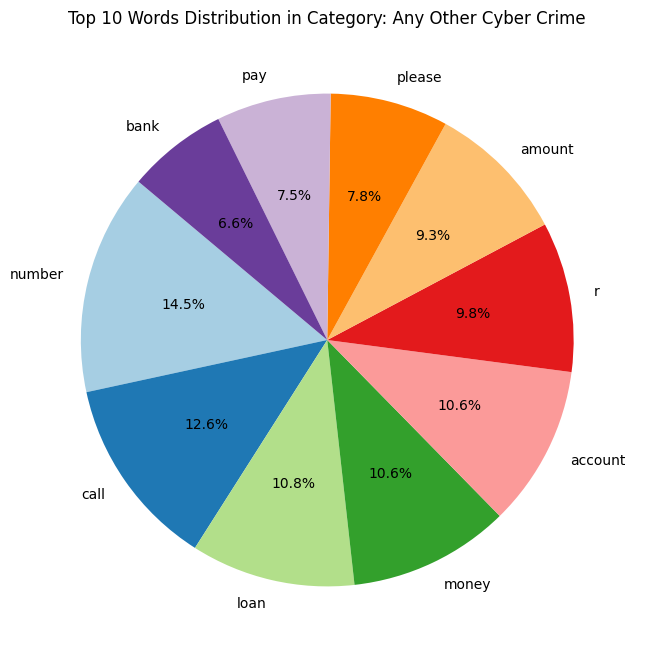

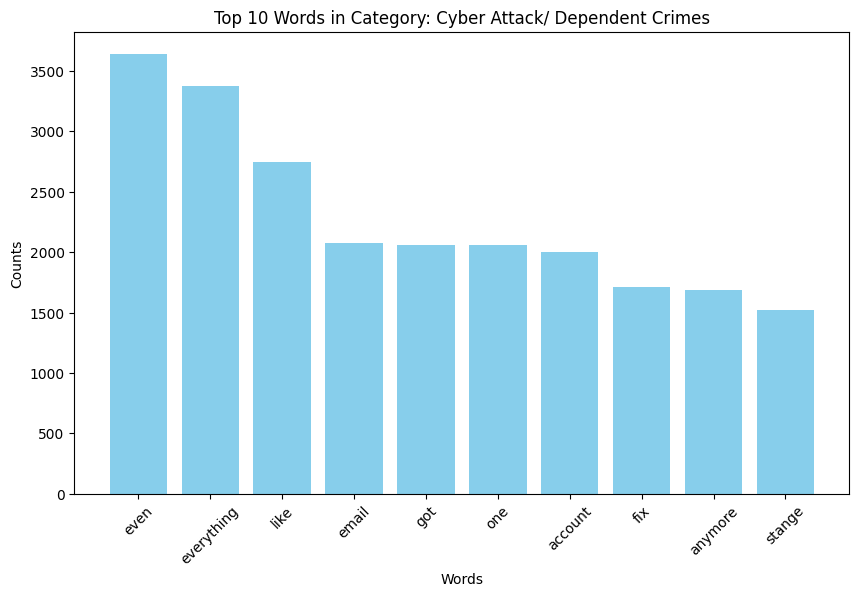

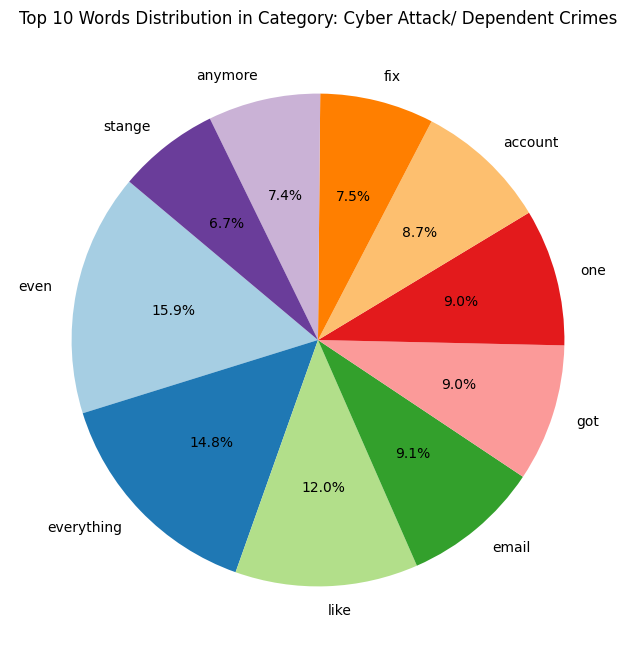

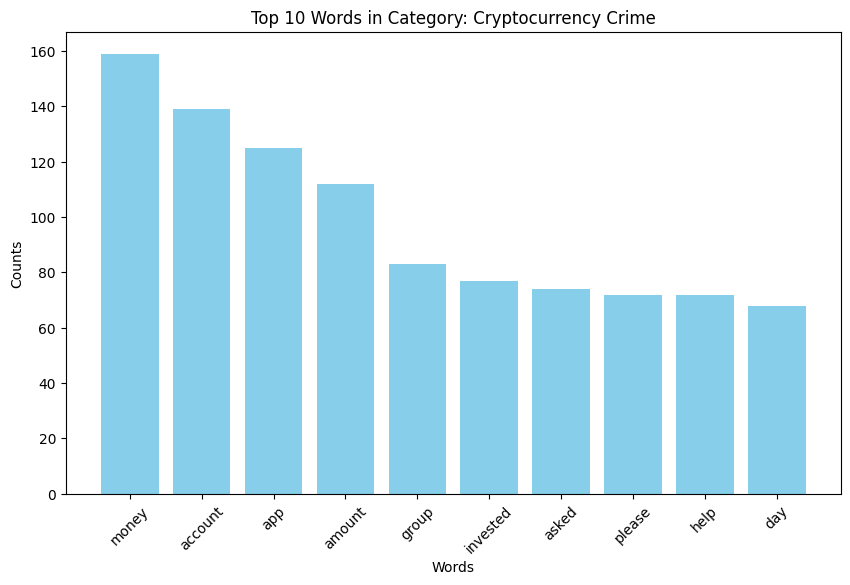

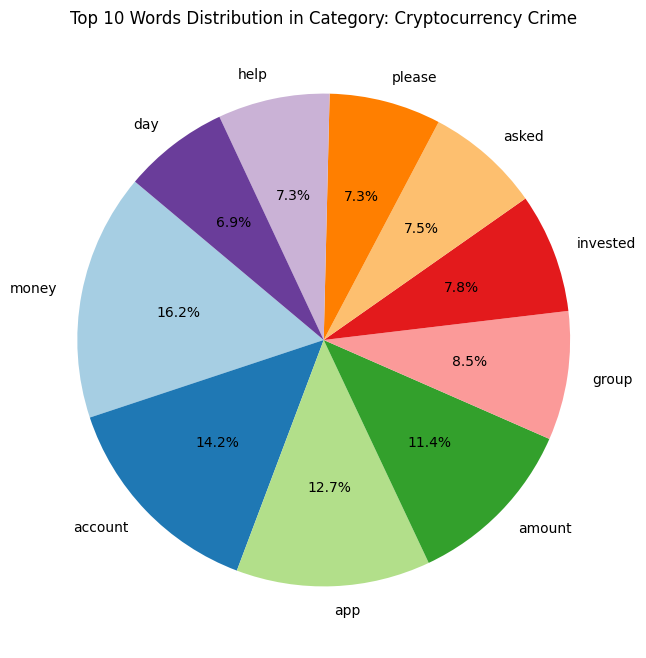

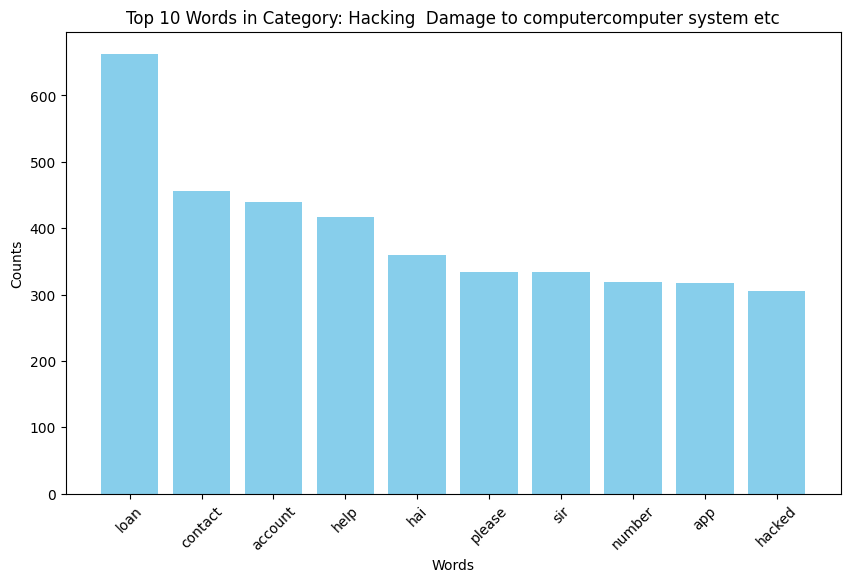

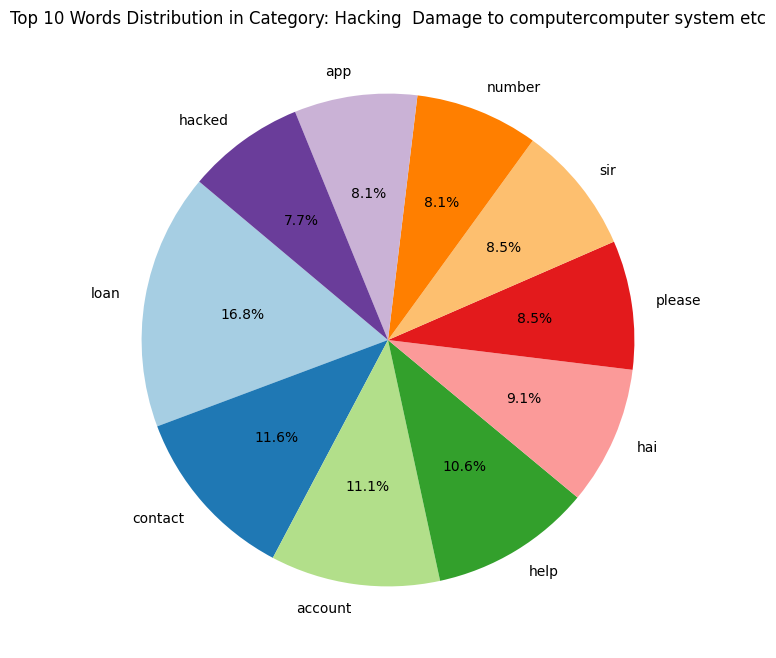

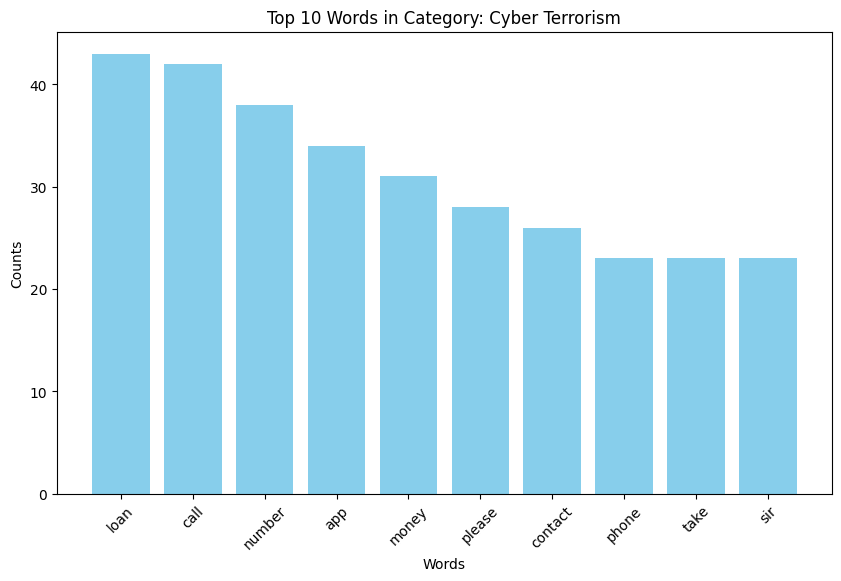

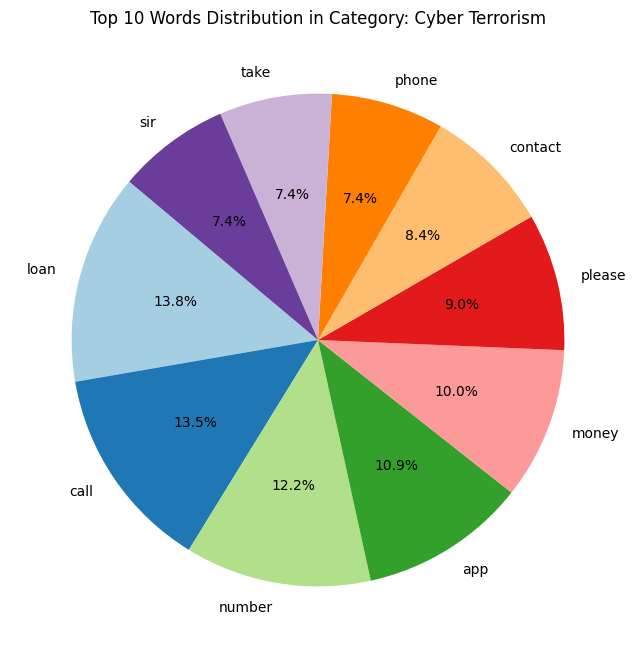

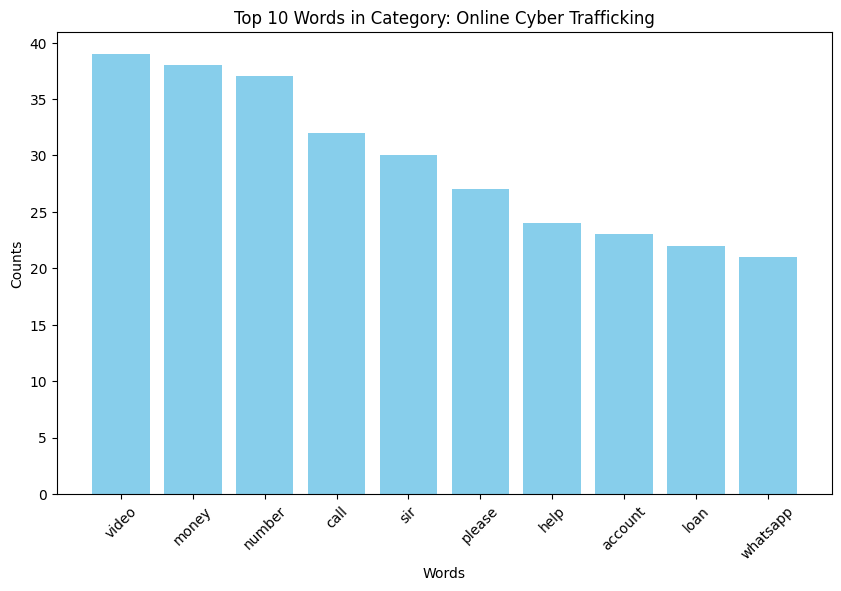

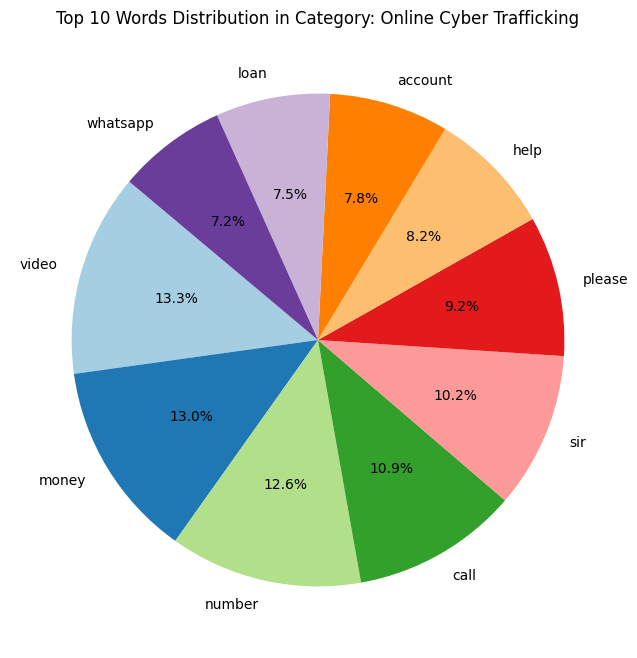

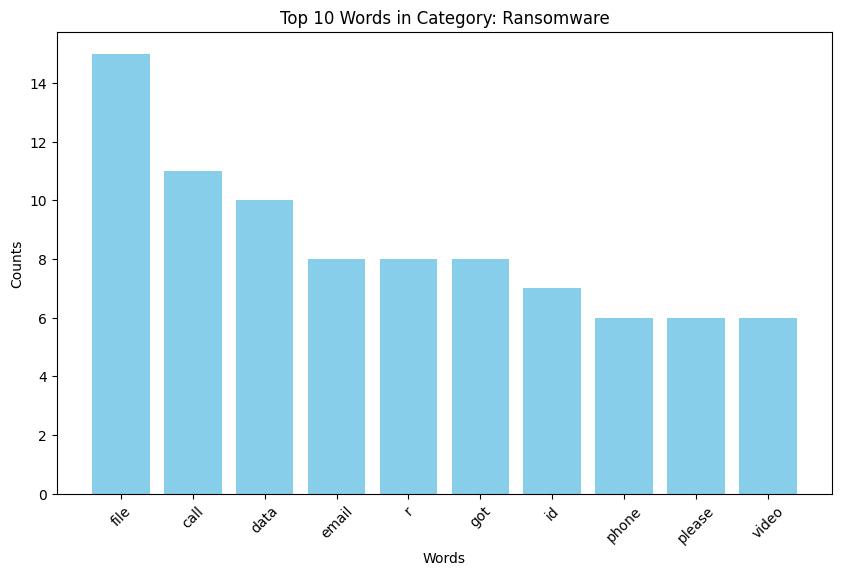

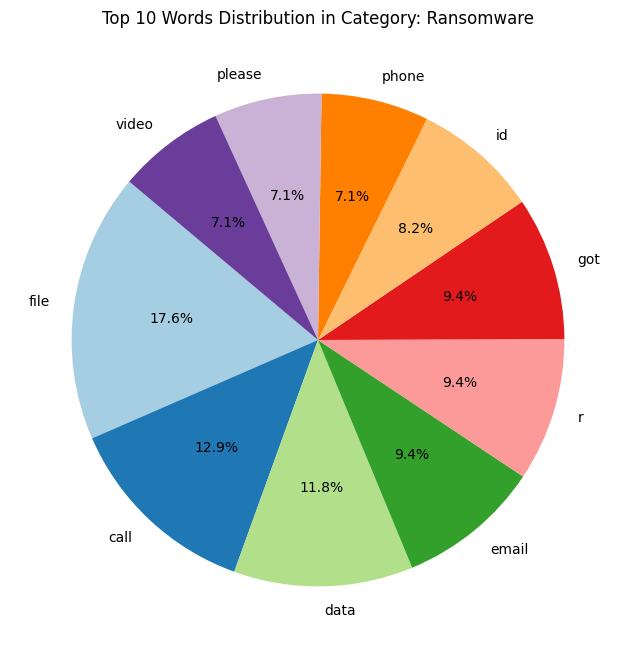

In [26]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

def get_top_words(text, num_words=10):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

categories = df['category'].unique()

for category in categories:
    # Filter data for the specific category and join the text into a single string
    text_for_wordcloud = ' '.join(df[df['category'] == category]['crimeaditionalinfo'].dropna())

    # Get top words from the text
    top_words = get_top_words(text_for_wordcloud)
    words, counts = zip(*top_words)

    # Create a DataFrame for the top words and counts
    top_words_df = pd.DataFrame(top_words, columns=['Word', 'Count'])

    # Bar chart for top words
    plt.figure(figsize=(10, 6))
    plt.bar(top_words_df['Word'], top_words_df['Count'], color='skyblue')
    plt.title(f"Top 10 Words in Category: {category}")
    plt.xlabel("Words")
    plt.ylabel("Counts")
    plt.xticks(rotation=45)
    plt.show()

    # Pie chart for top words distribution
    plt.figure(figsize=(8, 8))
    plt.pie(
        top_words_df['Count'],
        labels=top_words_df['Word'],
        autopct='%1.1f%%',
        colors=plt.cm.Paired.colors,
        startangle=140
    )
    plt.title(f"Top 10 Words Distribution in Category: {category}")
    plt.show()


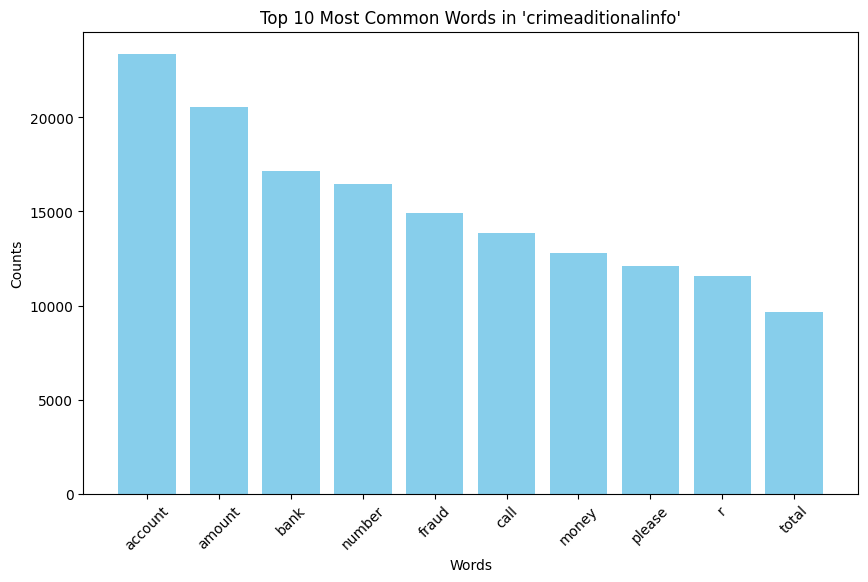

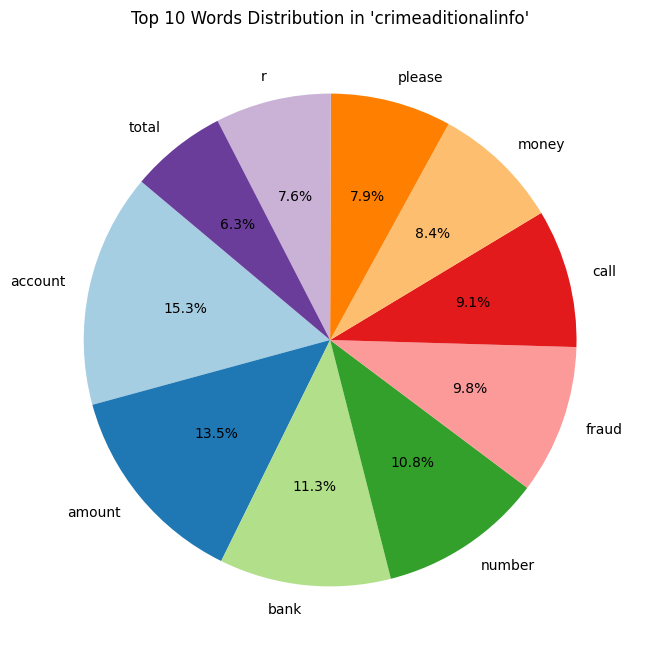

In [27]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Ensure there are no NaN values in the 'crimeaditionalinfo' column
df_cleaned = df['crimeaditionalinfo'].dropna()

# Join all the text data in the 'crimeaditionalinfo' column
text_for_wordcloud = ' '.join(df_cleaned)

# Normalize text: convert to lowercase and split into words
words = text_for_wordcloud.lower().split()

# Count word frequencies
word_counts = Counter(words)

# Get top 10 most common words
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

# Create DataFrame for the top words
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Count'])

# Bar chart for top words
plt.figure(figsize=(10, 6))
plt.bar(top_words_df['Word'], top_words_df['Count'], color='skyblue')
plt.title("Top 10 Most Common Words in 'crimeaditionalinfo'")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Pie chart for top words distribution
plt.figure(figsize=(8, 8))
plt.pie(
    top_words_df['Count'],
    labels=top_words_df['Word'],
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,
    startangle=140
)
plt.title("Top 10 Words Distribution in 'crimeaditionalinfo'")
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

In [29]:
label_encoder = LabelEncoder()
df['category_label'] = label_encoder.fit_transform(df['category'])

In [30]:
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category to Label Mapping:", category_mapping)

Category to Label Mapping: {'Any Other Cyber Crime': np.int64(0), 'Cryptocurrency Crime': np.int64(1), 'Cyber Attack/ Dependent Crimes': np.int64(2), 'Cyber Terrorism': np.int64(3), 'Hacking  Damage to computercomputer system etc': np.int64(4), 'Online Cyber Trafficking': np.int64(5), 'Online Financial Fraud': np.int64(6), 'Online Gambling  Betting': np.int64(7), 'Online and Social Media Related Crime': np.int64(8), 'Ransomware': np.int64(9)}


In [31]:
df

category  \
0      Online and Social Media Related Crime   
1                     Online Financial Fraud   
2                   Online Gambling  Betting   
3      Online and Social Media Related Crime   
4                     Online Financial Fraud   
...                                      ...   
35011                 Online Financial Fraud   
35012                 Online Financial Fraud   
35013                  Any Other Cyber Crime   
35014                 Online Financial Fraud   
35015  Online and Social Media Related Crime   

                               sub_category  \
0         Cyber Bullying  Stalking  Sexting   
1                         Fraud CallVishing   
2                  Online Gambling  Betting   
3                          Online Job Fraud   
4                         Fraud CallVishing   
...                                     ...   
35011  DebitCredit Card FraudSim Swap Fraud   
35012  DebitCredit Card FraudSim Swap Fraud   
35013                                 Other   
35014                    UPI Related Frauds   
35015        Profile Hacking Identity Theft   

                                      crimeaditionalinfo  category_label  
0      continue received random call abusive message ...               8  
1      fraudster continuously messaging asking pay mo...               6  
2      acting like police demanding money adding sect...               7  
3      apna job applied job interview telecalling res...               8  
4      received call lady stating send new phone vivo...               6  
...                                                  ...             ...  
35011  made payment via paytm due disturbance complai...               6  
35012  identity theft smishing sm fraud creditdebit c...               6  
35013  money ghaziabad applied loan online applicatio...               0  
35014  stole mobile using image blackmailing upload p...               6  
35015  fraud misusing identity demanding money abusin...               8  

[31060 rows x 4 columns]

In [32]:
df = df[['crimeaditionalinfo', 'category_label']]

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Drop rows where 'crimeaditionalinfo' is NaN
df_cleaned = df['crimeaditionalinfo'].dropna()

# Alternatively, you could replace NaN with empty strings:
# df['crimeaditionalinfo'].fillna('', inplace=True)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Apply tf-idf transformation
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned).toarray()


In [34]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
X_tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf_feature_names)

In [35]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure that both X_tfidf and y are aligned (both should have the same number of rows)
y = df['category_label']

# Drop rows where 'crimeaditionalinfo' or 'category_label' is NaN
df_cleaned = df[['crimeaditionalinfo', 'category_label']].dropna()

# Create X_tfidf from the cleaned 'crimeaditionalinfo'
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['crimeaditionalinfo']).toarray()

# Now, use the aligned 'category_label' as y
y = df_cleaned['category_label']

# Perform RandomOverSampling
X_resampled, y_resampled = RandomOverSampler(random_state=42).fit_resample(X_tfidf, y)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
log_reg = LogisticRegression(max_iter=200, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50      3995
           1       0.93      0.99      0.96      3995
           2       1.00      1.00      1.00      3995
           3       0.95      1.00      0.97      3996
           4       0.78      0.88      0.83      3996
           5       0.93      0.97      0.95      3995
           6       0.77      0.66      0.71      3996
           7       0.85      0.97      0.91      3995
           8       0.71      0.58      0.64      3995
           9       1.00      1.00      1.00      3996

    accuracy                           0.85     39954
   macro avg       0.84      0.85      0.85     39954
weighted avg       0.84      0.85      0.85     39954

Logistic Regression Confusion Matrix:



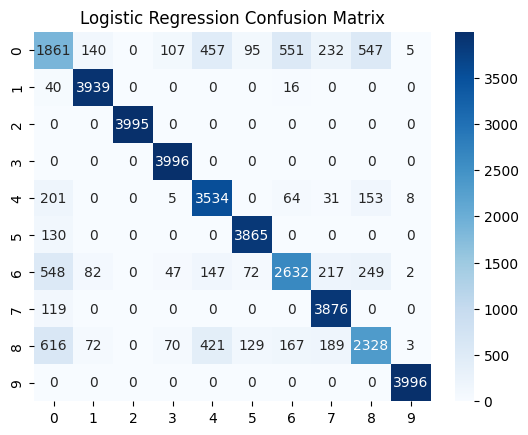

In [39]:
log_reg = LogisticRegression(max_iter=100, solver='liblinear')
log_reg.fit(X_train, y_train)  # No need to convert to 'sparse'

y_pred_log_reg = log_reg.predict(X_test)

# Print classification report and confusion matrix
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:\n")

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.03      0.05      3995
           1       0.92      0.48      0.63      3995
           2       1.00      1.00      1.00      3995
           3       0.16      1.00      0.28      3996
           4       0.73      0.40      0.52      3996
           5       0.59      0.15      0.24      3995
           6       1.00      0.17      0.29      3996
           7       0.98      0.05      0.09      3995
           8       0.46      0.18      0.26      3995
           9       0.90      0.75      0.82      3996

    accuracy                           0.42     39954
   macro avg       0.76      0.42      0.42     39954
weighted avg       0.76      0.42      0.42     39954

Decision Tree Confusion Matrix:



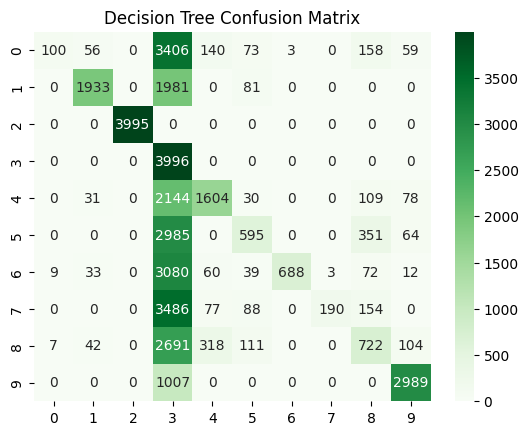

In [44]:
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.show()

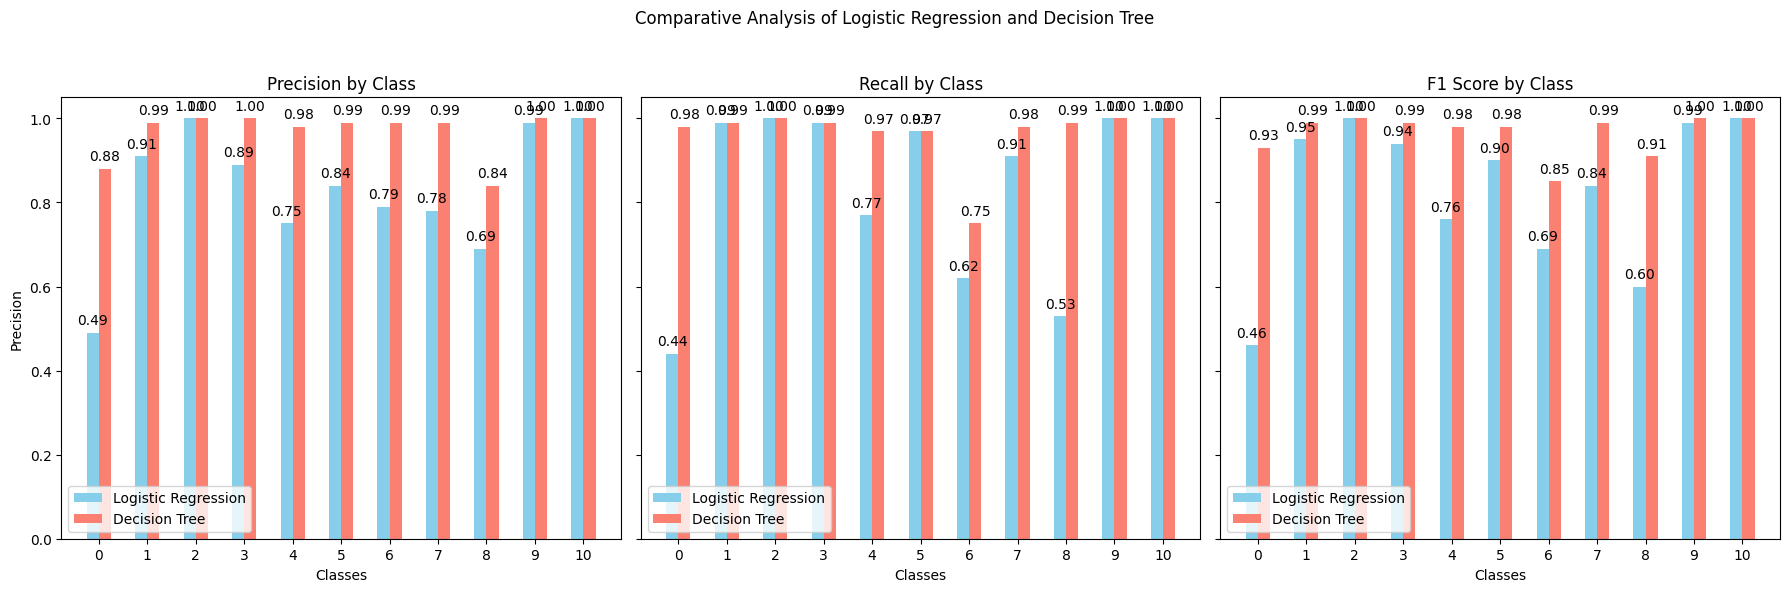

In [41]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

log_reg_precision = [0.49, 0.91, 1.00, 0.89, 0.75, 0.84, 0.79, 0.78, 0.69, 0.99, 1.00]
log_reg_recall = [0.44, 0.99, 1.00, 0.99, 0.77, 0.97, 0.62, 0.91, 0.53, 1.00, 1.00]
log_reg_f1 = [0.46, 0.95, 1.00, 0.94, 0.76, 0.90, 0.69, 0.84, 0.60, 0.99, 1.00]

dt_precision = [0.88, 0.99, 1.00, 1.00, 0.98, 0.99, 0.99, 0.99, 0.84, 1.00, 1.00]
dt_recall = [0.98, 0.99, 1.00, 0.99, 0.97, 0.97, 0.75, 0.98, 0.99, 1.00, 1.00]
dt_f1 = [0.93, 0.99, 1.00, 0.99, 0.98, 0.98, 0.85, 0.99, 0.91, 1.00, 1.00]

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

ax[0].bar(x - width / 2, log_reg_precision, width, label='Logistic Regression', color='skyblue')
ax[0].bar(x + width / 2, dt_precision, width, label='Decision Tree', color='salmon')
ax[0].set_title('Precision by Class')
ax[0].set_xticks(x)
ax[0].set_xticklabels(classes)
ax[0].set_xlabel('Classes')
ax[0].set_ylabel('Precision')
ax[0].legend()

for i in range(len(classes)):
    ax[0].text(i - width / 2, log_reg_precision[i] + 0.02, f'{log_reg_precision[i]:.2f}', ha='center')
    ax[0].text(i + width / 2, dt_precision[i] + 0.02, f'{dt_precision[i]:.2f}', ha='center')

ax[1].bar(x - width / 2, log_reg_recall, width, label='Logistic Regression', color='skyblue')
ax[1].bar(x + width / 2, dt_recall, width, label='Decision Tree', color='salmon')
ax[1].set_title('Recall by Class')
ax[1].set_xticks(x)
ax[1].set_xticklabels(classes)
ax[1].set_xlabel('Classes')
ax[1].legend()

for i in range(len(classes)):
    ax[1].text(i - width / 2, log_reg_recall[i] + 0.02, f'{log_reg_recall[i]:.2f}', ha='center')
    ax[1].text(i + width / 2, dt_recall[i] + 0.02, f'{dt_recall[i]:.2f}', ha='center')

ax[2].bar(x - width / 2, log_reg_f1, width, label='Logistic Regression', color='skyblue')
ax[2].bar(x + width / 2, dt_f1, width, label='Decision Tree', color='salmon')
ax[2].set_title('F1 Score by Class')
ax[2].set_xticks(x)
ax[2].set_xticklabels(classes)
ax[2].set_xlabel('Classes')
ax[2].legend()

for i in range(len(classes)):
    ax[2].text(i - width / 2, log_reg_f1[i] + 0.02, f'{log_reg_f1[i]:.2f}', ha='center')
    ax[2].text(i + width / 2, dt_f1[i] + 0.02, f'{dt_f1[i]:.2f}', ha='center')

plt.suptitle('Comparative Analysis of Logistic Regression and Decision Tree')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Random Forest with Differential Attention Accuracy: 0.97
Training Time (RF with Differential Attention): 30.6529 seconds


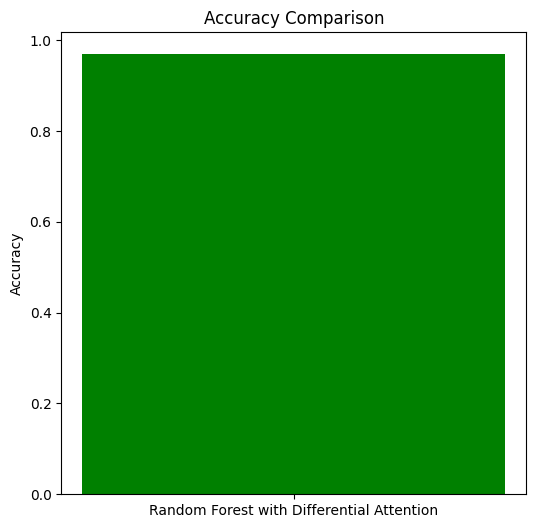

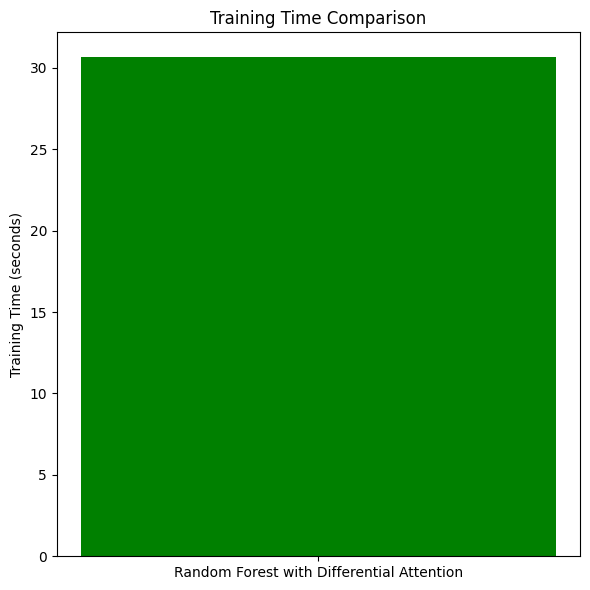

In [42]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def differential_attention_weights(X):
    attention_scores = np.var(X, axis=0)
    attention_scores = attention_scores / np.sum(attention_scores)
    return attention_scores

def apply_differential_attention(X, attention_scores):
    return X * attention_scores

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

attention_scores = differential_attention_weights(X_train)

X_train_attention = apply_differential_attention(X_train, attention_scores)
X_test_attention = apply_differential_attention(X_test, attention_scores)

start_time = time.time()
rf_attention_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_attention_clf.fit(X_train_attention, y_train)
rf_attention_accuracy = accuracy_score(y_test, rf_attention_clf.predict(X_test_attention))
rf_attention_training_time = time.time() - start_time

print(f"Random Forest with Differential Attention Accuracy: {rf_attention_accuracy:.2f}")
print(f"Training Time (RF with Differential Attention): {rf_attention_training_time:.4f} seconds")

plt.figure(figsize=(6, 6))

plt.bar(['Random Forest with Differential Attention'], [rf_attention_accuracy], color=['green'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

plt.figure(figsize=(6, 6))
plt.bar(['Random Forest with Differential Attention'], [rf_attention_training_time], color=['green'])
plt.title('Training Time Comparison')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()

# Copyright @ ThinkAI - A Machine Learning Community